# Recurrent Neural Networks



### Preprocesado de datos

In [1]:
# Importacion de las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importar datos de entrenamiento
dataset_train = pd.read_csv("https://raw.githubusercontent.com/joanby/deeplearning-az/master/datasets/Part%203%20-%20Recurrent%20Neural%20Networks%20(RNN)/Google_Stock_Price_Train.csv")
dataset_train.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [3]:
# Feature selection
training_set = dataset_train.iloc[ : , 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
# Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler( feature_range = (0,1))
training_set_scaled =  scaler.fit_transform( training_set )
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Crear una estructura de datos con 60 timesteps y 1 salida

In [5]:
X_train = []
y_train = []

for i in range(60, 1258):
  X_train.append(training_set_scaled[i - 60: i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [7]:
# Redimensión de los datos

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1) )
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

### Construccion de la RNN


In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [9]:
# Inicializacion del modelo
regressor = Sequential()
# Añadir la primera capade LSTM
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1) ) )
# Reguslarizacion por Dropout
regressor.add(Dropout(0.2))

# Añadir capa de LSTM con regularizacion
regressor.add(LSTM(units = 50, return_sequences = True ) )
regressor.add(Dropout(0.2))

# Añadir capa de LSTM con regularizacion
regressor.add(LSTM(units = 50, return_sequences = True ) )
regressor.add(Dropout(0.2))

# Añadir capa de LSTM con regularizacion
regressor.add(LSTM(units = 50 ) )
regressor.add(Dropout(0.2))

In [10]:
# Añadir la capa de salida
regressor.add( Dense(units = 1) )

In [11]:
# Compilar la RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# Ajustar la RNN anueestro conjunto de entrenamiento
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
38/38 [==============================] - 12s 120ms/step - loss: 0.0375
Epoch 2/200
38/38 [==============================] - 5s 121ms/step - loss: 0.0077
Epoch 3/200
38/38 [==============================] - 5s 122ms/step - loss: 0.0055
Epoch 4/200
38/38 [==============================] - 5s 121ms/step - loss: 0.0051
Epoch 5/200
38/38 [==============================] - 5s 121ms/step - loss: 0.0054
Epoch 6/200
38/38 [==============================] - 5s 123ms/step - loss: 0.0048
Epoch 7/200
38/38 [==============================] - 5s 123ms/step - loss: 0.0045
Epoch 8/200
38/38 [==============================] - 5s 122ms/step - loss: 0.0050
Epoch 9/200
38/38 [==============================] - 5s 122ms/step - loss: 0.0043
Epoch 10/200
38/38 [==============================] - 5s 122ms/step - loss: 0.0050
Epoch 11/200
38/38 [==============================] - 5s 123ms/step - loss: 0.0055
Epoch 12/200
38/38 [==============================] - 5s 121ms/step - loss: 0.0044
Epoch 13/200

### Ajustar las predicciones y visualizar los resultados

In [13]:
dataset_test = pd.read_csv('https://raw.githubusercontent.com/joanby/deeplearning-az/master/datasets/Part%203%20-%20Recurrent%20Neural%20Networks%20(RNN)/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [15]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

In [16]:
X_test = []

for i in range(60, 80):
  X_test.append(inputs[i - 60: i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1) )


In [17]:
predicted_stock_price = regressor.predict(X_test)

In [18]:
predicted_stock_price = scaler.inverse_transform( predicted_stock_price )

In [19]:
predicted_stock_price

array([[774.93976],
       [772.2994 ],
       [777.8547 ],
       [777.3388 ],
       [782.552  ],
       [790.8993 ],
       [792.94037],
       [791.1699 ],
       [792.7284 ],
       [793.9428 ],
       [794.2543 ],
       [793.7957 ],
       [793.5699 ],
       [794.9819 ],
       [795.6148 ],
       [805.7388 ],
       [812.1645 ],
       [818.11487],
       [817.0226 ],
       [804.3095 ]], dtype=float32)

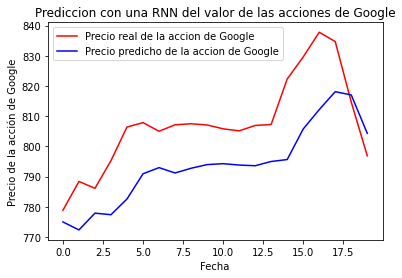

In [20]:
# Visualizar resultados
plt.plot(real_stock_price, color = 'red', label = 'Precio real de la accion de Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Precio predicho de la accion de Google')
plt.title('Prediccion con una RNN del valor de las acciones de Google')
plt.xlabel('Fecha')
plt.ylabel('Precio de la acción de Google')
plt.legend()
plt.show()

In [21]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [22]:
rmse

16.086693338979757